In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import os
os.getcwd()

'C:\\Users\\DD\\Desktop\\IITB_PYTHON_CODES'

In [6]:
%cd "C:\IIIT-B\casestudy\DD_WORK\EDA\GramenerCaseStudy-master\GramenerCaseStudy-master\data" 

C:\IIIT-B\casestudy\DD_WORK\EDA\GramenerCaseStudy-master\GramenerCaseStudy-master\data


# Read data

In [7]:
import pandas as pd
import numpy as np


loan_dataset = pd.read_csv('../data/loan.csv', encoding = 'ISO-8859-1')

loan_dataset.shape

C:\Users\DD\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

In [8]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data cleaning

In [9]:
loan_nulls = loan_dataset.isnull().sum()
loan_nulls_percent = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2)

loan_nulls_detials = pd.concat([loan_nulls, loan_nulls_percent], axis=1)
loan_nulls_detials.rename(columns={0: 'no_of_nulls', 1: 'percent_of_nulls'}, inplace=True)
loan_nulls_detials.groupby(['percent_of_nulls']).agg('count') #.sort_values(ascending=False)

,no_of_nulls
percent_of_nulls,
0.00,43
0.01,1
0.03,1
0.10,1
0.13,1
0.14,2
0.18,1
1.75,1
2.71,1


In [10]:
#loan_nulls_detials.to_csv('out.csv')

In [11]:
#Droping all the columns where there are more than 90% of Nulls
loan_dataset_cleaned = loan_dataset.dropna(thresh = len(loan_dataset) * .1, axis = 1)
loan_dataset_cleaned.shape

(39717, 55)

In [12]:
# Drop rows with more than 30% NaN Values
loan_dataset_cleaned = loan_dataset_cleaned.dropna(how='all')
loan_dataset_cleaned.shape

(39717, 55)

In [13]:
# Find out how many columns have single value
single_value_columns = loan_dataset_cleaned.nunique()
single_value_columns = single_value_columns[single_value_columns.values==1]
single_value_columns

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [14]:
# Drop all columns where there are single values
loan_dataset_cleaned.drop(labels = list(single_value_columns.index), axis = 1, inplace = True)


In [15]:
print(loan_dataset_cleaned.shape)
loan_dataset_cleaned

(39717, 46)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


In [16]:
round(100*(loan_dataset_cleaned.isnull().sum()/len(loan_dataset_cleaned.index)), 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [17]:
#Update emp_length to 'Self' when both emp_title and emp_length is blank
#loan_dataset_cleaned['emp_length'] = np.where((loan_dataset_cleaned.emp_title.isnull() & 
#                                              loan_dataset_cleaned.emp_length.isnull()), 
#                                             'Self', np.nan)


In [18]:
#lambda (loan_dataset_cleaned['emp_length'].apply : 'Self' if loan_dataset_cleaned.emp_length.str.strip() == '' else "Something")

In [19]:
loan_dataset_cleaned.emp_length.fillna('0',inplace=True)
loan_dataset_cleaned.mths_since_last_delinq.fillna(0,inplace=True)

In [20]:
# deleting unwanted columns like url, zip code and desc
loan_dataset_cleaned.drop(labels = ["url","zip_code","desc"], axis =1, inplace=True)

In [21]:
loan_dataset_cleaned.shape

(39717, 43)

In [22]:
round(100*(loan_dataset_cleaned.isnull().sum()/len(loan_dataset_cleaned.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq     0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prnc

In [23]:
#loan_dataset_cleaned.to_csv('loan_dataset_cleaned.csv')

In [24]:
loan_dataset_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [25]:
# Check for duplicate columns, there are none
#loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned.duplicated(['loan_amnt', 'funded_amnt'],keep=False)]
loan_dataset_cleaned = loan_dataset_cleaned.loc[:, ~loan_dataset_cleaned.columns.duplicated()]
loan_dataset_cleaned.shape

(39717, 43)

In [26]:
# Number of blank employee titles

print(loan_dataset_cleaned.emp_title.isnull().sum())

2459


In [27]:
# convert continuous variables to numeric
# remove the % sign in int_rate
loan_dataset_cleaned['int_rate'] = loan_dataset_cleaned['int_rate'].str[:-1]
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan_dataset_cleaned[numeric_columns] = loan_dataset_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')
loan_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 43 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
title    

# Derived Metrics

Type driven derived metrics

In [28]:
# Create year and month columns from issue date column

loan_dataset_cleaned['issue_month'] = loan_dataset_cleaned['issue_d'].str.split("-").str[0]
loan_dataset_cleaned['issue_year'] = loan_dataset_cleaned['issue_d'].str.split("-").str[-1]
# convert year to the format YYYY
loan_dataset_cleaned['issue_year'] = '20' + loan_dataset_cleaned.issue_year
loan_dataset_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011


Business driven derived metrics

# Univariate Analysis

Here are the unordered,ordered and quantitative variables

Unordered - purpose,home_ownership,addr_state, verification_status

Ordered - loan_status,term, issue_year,Grade,Sub-grade,issue_month 


Quantitative variables - loan_amnt,annual_inc,int_rate,dti

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting unordered categorical variables

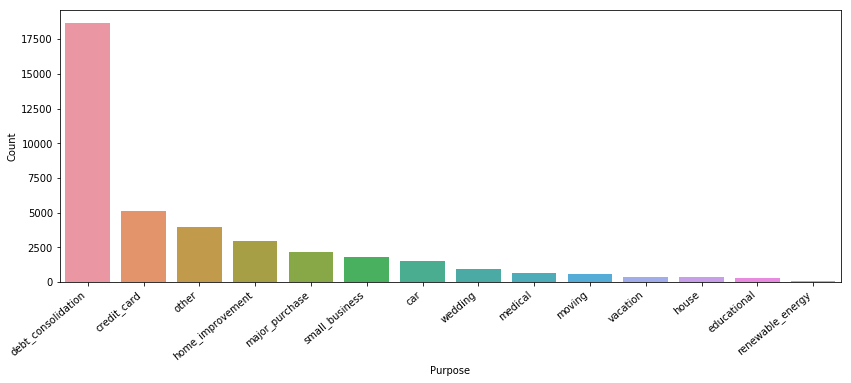

In [30]:
# For unordered categorical variables, use count plot
# count plot for 'purpose'
plt.figure(figsize=(14, 5))
fig = sns.countplot(loan_dataset_cleaned.purpose.dropna(), order = loan_dataset_cleaned.purpose.value_counts().index)
fig.set(xlabel='Purpose', ylabel='Count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
plt.show()

Observations: Max number of loans are taken for debt_consolidation

[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

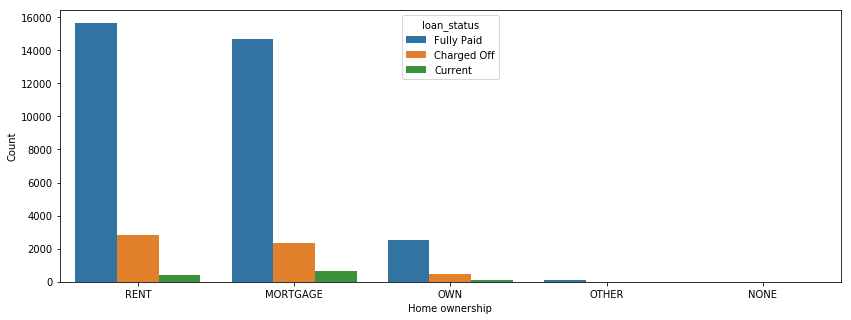

In [31]:
# count plot for home_ownership
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.home_ownership.dropna(), order = loan_dataset_cleaned.home_ownership.value_counts().index,hue=loan_dataset_cleaned.loan_status)
fig.set(xlabel='Home ownership', ylabel='Count')

Observations:Majority of applicants reside in a rented home or an a mortgage.

In [32]:
# remove the entries for "Other" and "None" in home_ownership
rem = ['OTHER', 'NONE', 'ANY']
loan_dataset_cleaned.drop(loan_dataset_cleaned[loan_dataset_cleaned['home_ownership'].isin(rem)].index,inplace=True)


[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

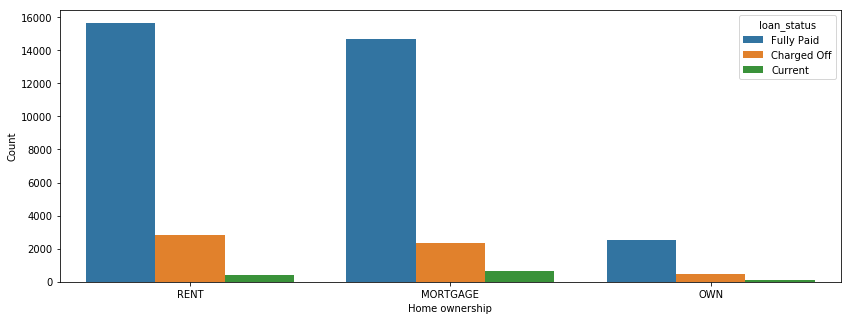

In [33]:
# count plot for home_ownership
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.home_ownership.dropna(), order = loan_dataset_cleaned.home_ownership.value_counts().index,hue=loan_dataset_cleaned.loan_status)
fig.set(xlabel='Home ownership', ylabel='Count')

[Text(0,0.5,'Count'), Text(0.5,0,'State')]

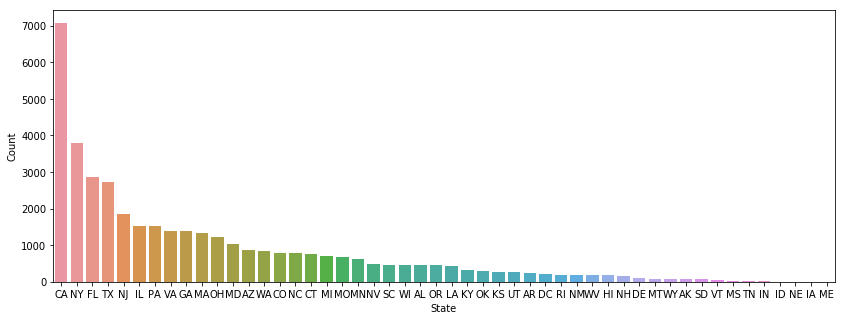

In [34]:
# count plot for state
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.addr_state.dropna(), order = loan_dataset_cleaned.addr_state.value_counts().index)
fig.set(xlabel='State', ylabel='Count')

Observations: CA followed by NY have the most number of loan applicants

[Text(0,0.5,'Count'), Text(0.5,0,'Verification status')]

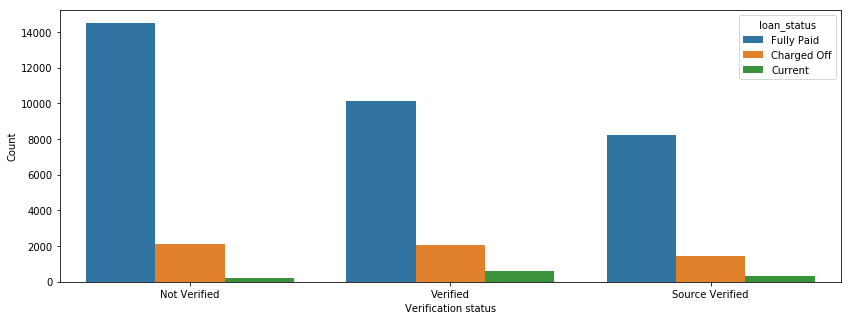

In [35]:
# countplot for verification status
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.verification_status.dropna(), order = loan_dataset_cleaned.verification_status.value_counts().index,hue=loan_dataset_cleaned.loan_status)
fig.set(xlabel='Verification status', ylabel='Count')

Observations: Most of the applicants are not verified - which is an interesting point to note!

## Plotting ordered categorical variables

[Text(0,0.5,'Count'), Text(0.5,0,'Loan status')]

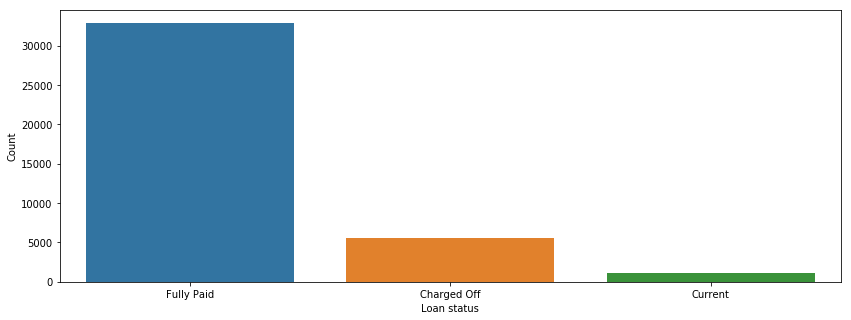

In [36]:
#countplot for loan status
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.loan_status.dropna(), order = loan_dataset_cleaned.loan_status.value_counts().index)
fig.set(xlabel='Loan status', ylabel='Count')

Observations: About 5000 applicants are charged off.

[Text(0,0.5,'Count'), Text(0.5,0,'Year of issue')]

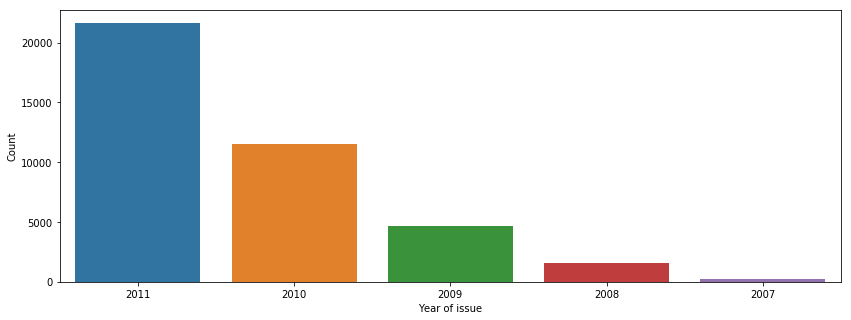

In [37]:
#countplot for year of issue
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.issue_year.dropna(), order = loan_dataset_cleaned.issue_year.value_counts().index)
fig.set(xlabel='Year of issue', ylabel='Count')

Observations: There is a steady increase in the number of applications from 2007 to 2011. Most of the applicants received their loan in 2011.

[Text(0,0.5,'Count'), Text(0.5,0,'Loan term')]

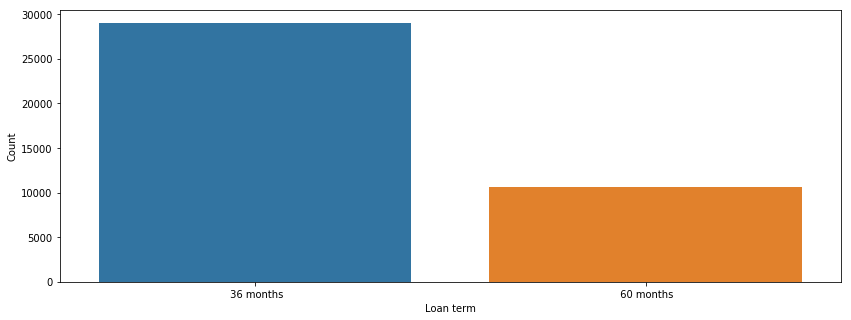

In [38]:
#countplot for loan term
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.term.dropna(),order = loan_dataset_cleaned.term.value_counts().index)
fig.set(xlabel='Loan term',ylabel='Count')

Observations: 70% of applicants applied for a loan of duration of 36 months.

[Text(0,0.5,'Count'), Text(0.5,0,'Grade')]

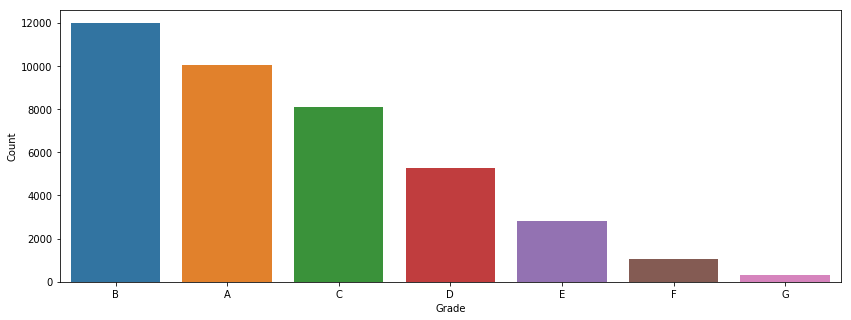

In [39]:
# countplot for grade
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.grade.dropna(),order = loan_dataset_cleaned.grade.value_counts().index)
fig.set(xlabel='Grade',ylabel='Count')

## Plotting quantitative variables

[Text(0,0.5,'Count'), Text(0.5,0,'Loan amount')]

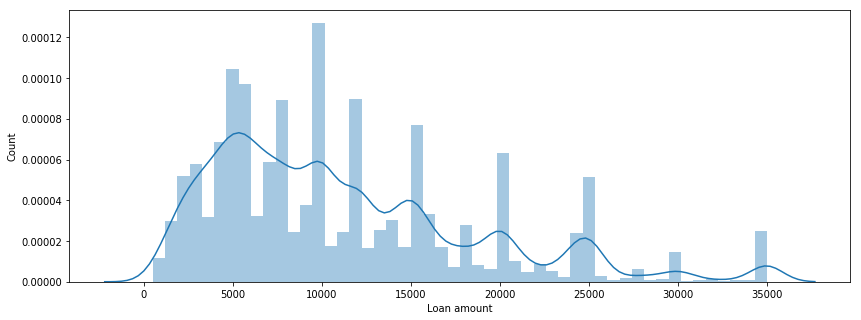

In [40]:
# Distribution plot for loan amount
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['loan_amnt'])
fig.set(xlabel='Loan amount',ylabel='Count')

Observations: Majority of the loan amounts applied for is between 5000 USD to 20000 USD

[Text(0,0.5,'Count'), Text(0.5,0,'Annual Income')]

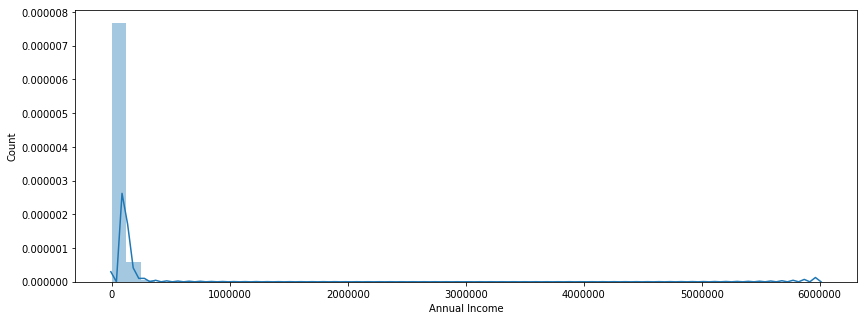

In [41]:
# Distribution plot for annual income
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['annual_inc'])
fig.set(xlabel='Annual Income',ylabel='Count')
#sns.boxplot(data = loan_dataset_cleaned, x='annual_inc',orient='v')

Observations: There are outliers in annual income column and will need to be excluded.

In [42]:
loan_dataset_cleaned["annual_inc"].describe()

count    3.961600e+04
mean     6.896224e+04
std      6.379013e+04
min      4.000000e+03
25%      4.044900e+04
50%      5.900000e+04
75%      8.229700e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Max value is 6000000 which is way above the mean value of 68962. So this value has to be excluded.

In [43]:
percent95 = loan_dataset_cleaned["annual_inc"].quantile(0.995)
loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned["annual_inc"] < percent95]
loan_dataset_cleaned["annual_inc"].describe()

count     39394.000000
mean      66378.442227
std       37410.922236
min        4000.000000
25%       40002.000000
50%       58758.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

[Text(0,0.5,'Count'), Text(0.5,0,'Annual Income')]

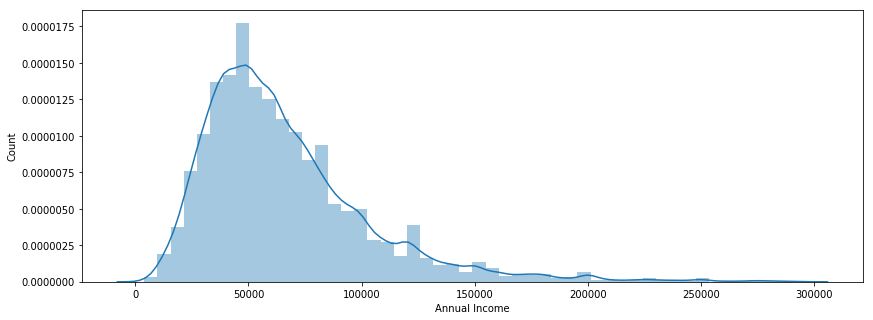

In [44]:

plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['annual_inc'])
fig.set(xlabel='Annual Income',ylabel='Count')

Observations: Majority of the loan applicants have an annual income of 50000 USD to 100000 USD

[Text(0,0.5,'Count'), Text(0.5,0,'Interest rate')]

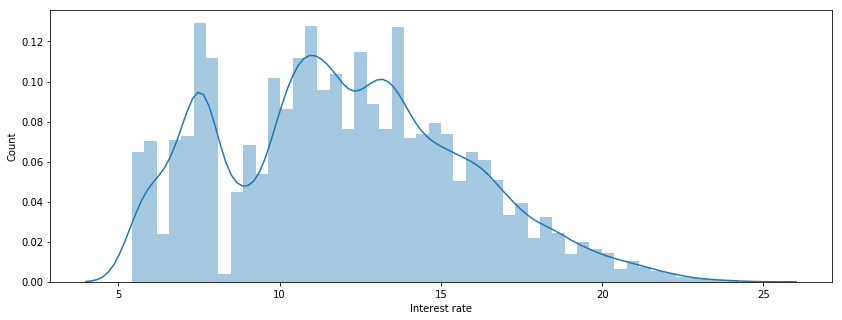

In [45]:
# Distribution plot for interest rate
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['int_rate'])
fig.set(xlabel='Interest rate',ylabel='Count')

Observations: The bulk of the loans are either between 7 to 9 percent or between 12 to 16 percent interest rate.

[Text(0,0.5,'Count'), Text(0.5,0,'DTI')]

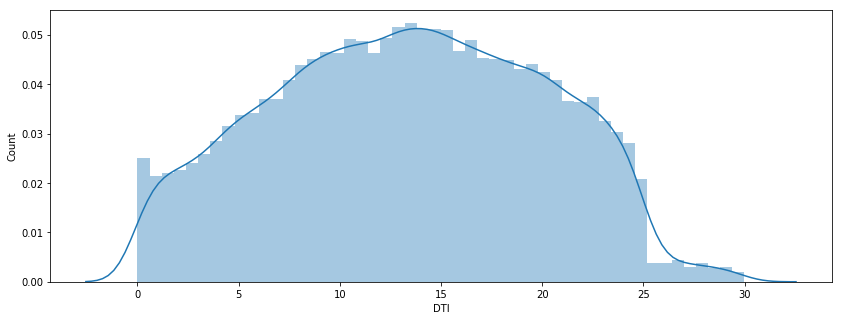

In [46]:
# Distribution plot for dti
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['dti'])
fig.set(xlabel='DTI',ylabel='Count')

Observations:

    DTI : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


## Univariate Conclusions

1) Most of the loans are taken to consolidate debts from other loans.

2) Majority of applicants stay in rented or mortgaged house.

3) A significant number of loan applicants are from CA and NY.

4) Verification status does not seem to be of significance since most of the applicants are not verified.

5) A considerable number of applicants have charged off.

6) Most of the loans are issued in 2011.

7) About 70% of the loans are for a tenure of 36 months.

8) Grade does not seem to have any clear pattern - needs more analysis.

9) Most of the loan amount is between 5000-20000 USD.

10) A large portion of the applicants have an annual income of 50000 to 100000 USD.

11) THe most prevalent interest rates are 12 to 16 percent.

12) DTI needs to be further analysed.

# Bivariate Analysis

In [154]:
loan_dataset_cleaned1 =  loan_dataset_cleaned

In [155]:
loan_dataset_cleaned1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'loan_status_modf'],
      dtype='object')

In [156]:
# Create new variable for Default Status
#elite only
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Charged Off', 'loan_status_num'] = 1 ## Default 
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Current', 'loan_status_num'] = 0 ## Non Default
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Fully Paid', 'loan_status_num'] = 0 ## Non Default

In [157]:
X_features = list( loan_dataset_cleaned1.columns )

In [158]:
X_features.remove('id')
X_features.remove('member_id')
X_features.remove('term')
X_features.remove('grade')
X_features.remove('sub_grade')
X_features.remove('emp_title')
X_features.remove('emp_length')
X_features.remove('home_ownership')
X_features.remove('verification_status')
X_features.remove('issue_d')
#X_features.remove('loan_status')
#X_features.remove('pymnt_plan')
#X_features.remove('url')
#X_features.remove('desc')
X_features.remove('purpose')
X_features.remove('title')
#X_features.remove('zip_code')
X_features.remove('addr_state')
X_features.remove('earliest_cr_line')
X_features.remove('out_prncp')
X_features.remove('out_prncp_inv')
X_features.remove('total_rec_late_fee')
X_features.remove('recoveries')
X_features.remove('collection_recovery_fee')
X_features.remove('last_pymnt_d')
X_features.remove('last_credit_pull_d')
#X_features.remove('collections_12_mths_ex_med')
#X_features.remove('policy_code')
#X_features.remove('application_type')
#X_features.remove('acc_now_delinq')
#X_features.remove('chargeoff_within_12_mths')
#X_features.remove('delinq_amnt')
X_features.remove('pub_rec_bankruptcies')
#X_features.remove('tax_liens')


# Correlation Analysis for all numerical variables

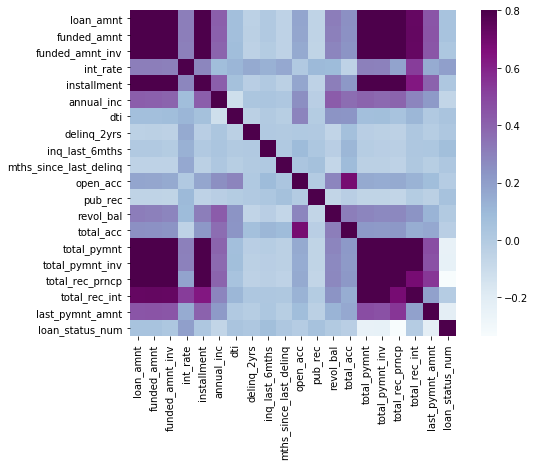

In [159]:
# Print correlation matrix to understand the correlation of all numerical variables
matrix = loan_dataset_cleaned1[X_features].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [146]:
# Above correlation Plot shows:Loan amount ,funded amount ,funded amount inv,total payment inv,total rec prncp all are highlty correlated which is making sense in this problem: We need to create derived ratio like loan to fund amount ratio etc

# Default Variable Creation

In [147]:
# Create new variable for Default Status
#elite only
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Charged Off', 'loan_status_modf'] = '1:Default' ## Default 
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Current', 'loan_status_modf'] = '0:Non Default' ## Non Default
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Fully Paid', 'loan_status_modf'] = '0:Non Default' ## Non Default

# Term vs Default Status

loan_status_modf  0:Non Default  1:Default
term                                      
 36 months                25645       3196
 60 months                 8164       2389


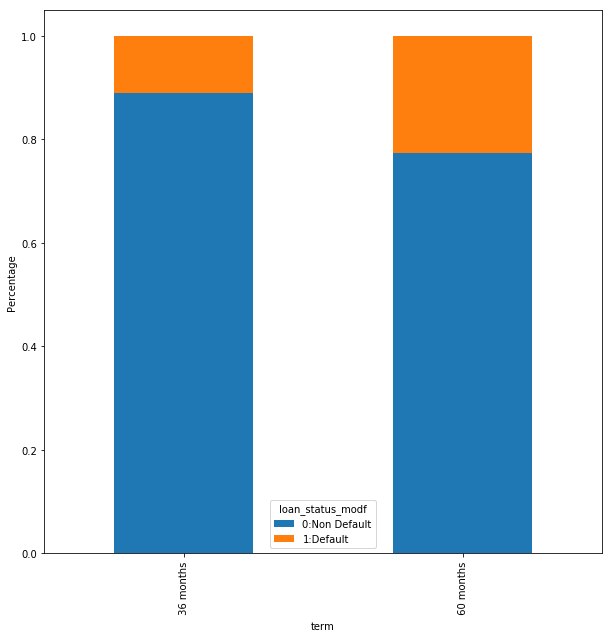

In [148]:
print(pd.crosstab(loan_dataset_cleaned1['term'],loan_dataset_cleaned1['loan_status_modf']))

term=pd.crosstab(loan_dataset_cleaned1['term'],loan_dataset_cleaned1['loan_status_modf'])
term.div(term.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('term')
p = plt.ylabel('Percentage')
# Note: Long term loans(60 months) will have higher default rate

# Grade vs Default Status

loan_status_modf  0:Non Default  1:Default
grade                                     
A                          9426        600
B                         10521       1412
C                          6691       1340
D                          4149       1111
E                          2093        708
F                           721        315
G                           208         99


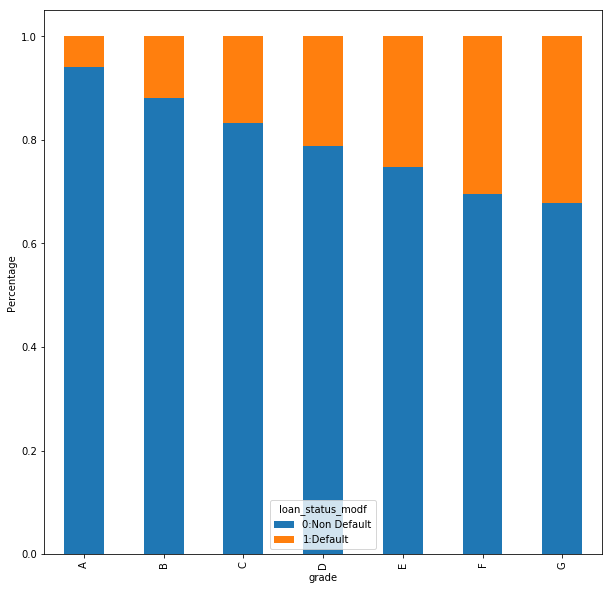

In [149]:
print(pd.crosstab(loan_dataset_cleaned1['grade'],loan_dataset_cleaned1['loan_status_modf']))

grade=pd.crosstab(loan_dataset_cleaned1['grade'],loan_dataset_cleaned1['loan_status_modf'])
grade.div(grade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('grade')
p = plt.ylabel('Percentage')
# Note: Grade F & G are top most 2 grades which will have higher default rate

# emp_length vs Default Status

loan_status_modf  0:Non Default  1:Default
emp_length                                
0                           845        227
1 year                     2756        451
10+ years                  7460       1317
2 years                    3797        563
3 years                    3513        550
4 years                    2959        458
5 years                    2803        456
6 years                    1912        305
7 years                    1502        261
8 years                    1261        203
9 years                    1093        158
< 1 year                   3908        636


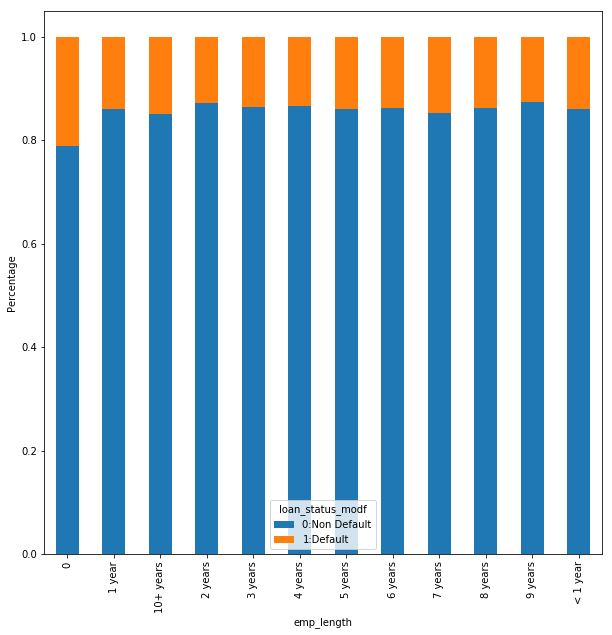

In [150]:
print(pd.crosstab(loan_dataset_cleaned1['emp_length'],loan_dataset_cleaned1['loan_status_modf']))

emp_length=pd.crosstab(loan_dataset_cleaned1['emp_length'],loan_dataset_cleaned1['loan_status_modf'])
emp_length.div(emp_length.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('emp_length')
p = plt.ylabel('Percentage')
# Note: People with No experience will have higher default rate

# home_ownership vs Default Status

loan_status_modf  0:Non Default  1:Default
home_ownership                            
MORTGAGE                  15192       2314
OWN                        2600        440
RENT                      16017       2831


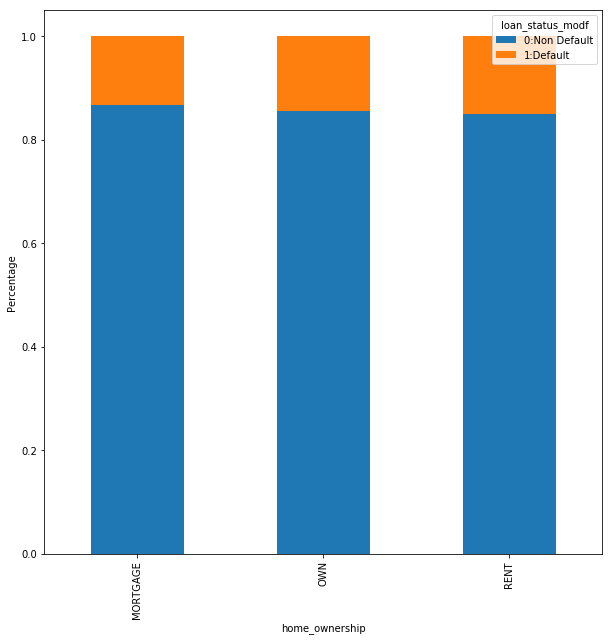

In [151]:
print(pd.crosstab(loan_dataset_cleaned1['home_ownership'],loan_dataset_cleaned1['loan_status_modf']))

home_ownership=pd.crosstab(loan_dataset_cleaned1['home_ownership'],loan_dataset_cleaned1['loan_status_modf'])
home_ownership.div(home_ownership.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('home_ownership')
p = plt.ylabel('Percentage')
# Note: Home ownership doesn't show any impact on default rate

In [ ]:
# verification_status vs Default Status

loan_status_modf     0:Non Default  1:Default
verification_status                          
Not Verified                 14680       2125
Source Verified               8479       1425
Verified                     10650       2035


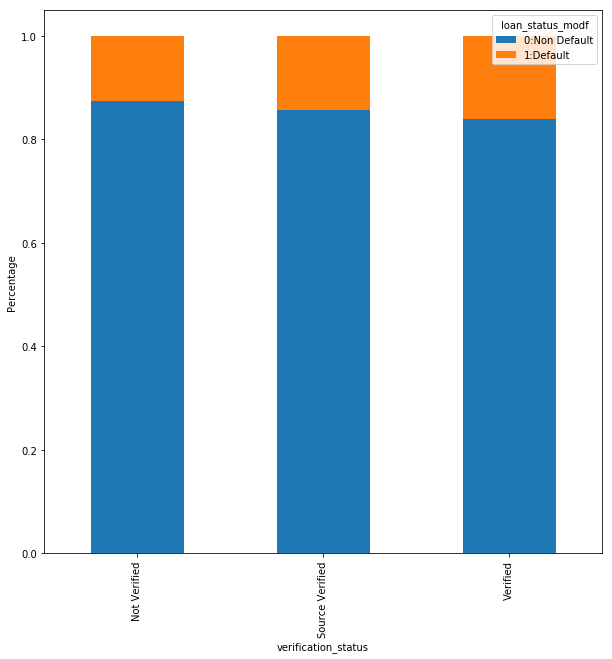

In [152]:
print(pd.crosstab(loan_dataset_cleaned1['verification_status'],loan_dataset_cleaned1['loan_status_modf']))

verification_status=pd.crosstab(loan_dataset_cleaned1['verification_status'],loan_dataset_cleaned1['loan_status_modf'])
verification_status.div(verification_status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('verification_status')
p = plt.ylabel('Percentage')
# Note:verification_status doesn't show any impact on default rate

# purpose vs Default Status

loan_status_modf    0:Non Default  1:Default
purpose                                     
car                          1386        159
credit_card                  4560        539
debt_consolidation          15766       2753
educational                   265         56
home_improvement             2578        340
house                         315         59
major_purchase               1949        220
medical                       580        106
moving                        487         90
other                        3333        628
renewable_energy               82         19
small_business               1336        469
vacation                      328         53
wedding                       844         94


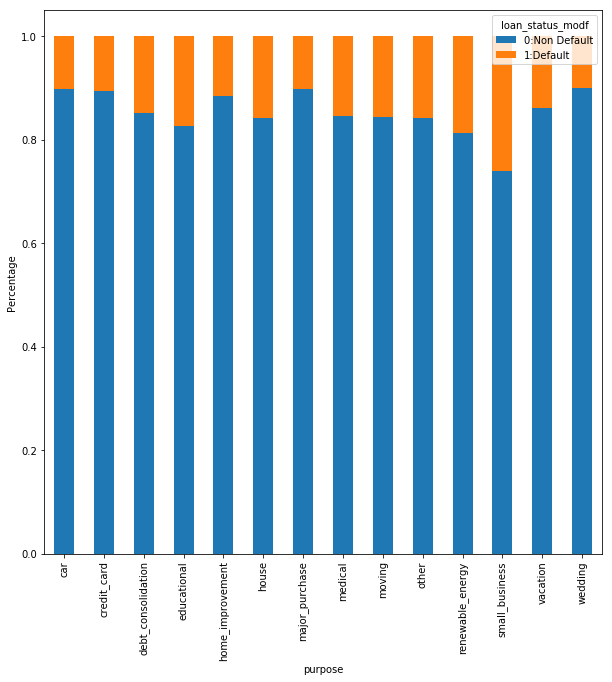

In [153]:
print(pd.crosstab(loan_dataset_cleaned1['purpose'],loan_dataset_cleaned1['loan_status_modf']))

purpose=pd.crosstab(loan_dataset_cleaned1['purpose'],loan_dataset_cleaned1['loan_status_modf'])
purpose.div(purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('purpose')
p = plt.ylabel('Percentage')
# Note:small business,renewable energy and education loans have highre default rate